# The Project (Bird's-Eye View)

There are four general steps that we’ll be following as we move through this project:

* Prepare the data
* Build the model
* Train the model
* Analyze the model’s results

**For loading data:**

- Extract data from data source (Get Fashion-MNIST data from sourse)

- Transform data into it's desireable format (Put data into tensor form)

- Load data into suitable structure (Put data into an object to make it easily accessible)

In [44]:
import torch                                       #Pytorch pkg & tensor library
import torchvision                                 #
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth= 120)

In [45]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True                               #Extract
    ,transform=transforms.Compose([
        transforms.ToTensor()                    #Transform
    ])
)

In [46]:
train_loder= torch.utils.data.DataLoader(train_set, batch_size= 10) #Load, default batch_size=1

In [47]:
len(train_set)

60000

In [48]:
train_set.train_labels # 9= ankelboots; 0= t-shirts etc.

tensor([9, 0, 0,  ..., 3, 0, 5])

In [49]:
train_set.train_labels.bincount() # All have same frequencies(6000), hence balanced
                                  # If the values would vary, it is imbalanced data
                                  # Oversampling is the best method to deal with imbalance data

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [50]:
# To access indivisual object from the dataset
sample= next(iter(train_set))

In [51]:
len(sample)  #To check the number of items

2

In [52]:
type(sample)

tuple

In [53]:
image, label= sample    #Sequence unpacking
# Alternative way for sequence unpacking
# image= sample[0]
# lable= sample[1]

In [54]:
image.shape

torch.Size([1, 28, 28])

In [55]:
label.shape    # Since 'lable' is a scalar in the dataset, shape wont exist

AttributeError: 'int' object has no attribute 'shape'

label:9


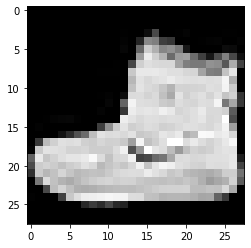

In [56]:
plt.imshow(image.squeeze(), cmap='gray')
print('label:' + str(label))

In [57]:
batch= next(iter(train_loder))

In [58]:
len(batch)

2

In [59]:
type(batch)

list

In [60]:
images, labels= batch


In [61]:
images.shape

torch.Size([10, 1, 28, 28])

In [62]:
labels.shape

torch.Size([10])

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


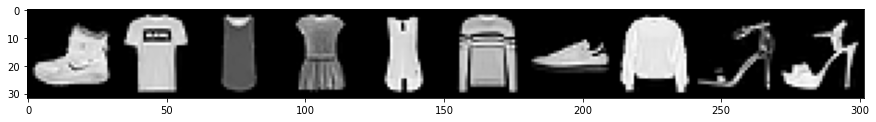

In [63]:
grid= torchvision.utils.make_grid(images, nrow= 10)

plt.figure(figsize=(15, 15))
plt.imshow(np.transpose(grid, (1, 2, 0)))

print('labels:', labels)

## Trying same by increasing batch size

Increasing batch size will increase the number for images in single batch

In [64]:
train_loader= torch.utils.data.DataLoader(train_set, batch_size= 200)

In [65]:
batch= next(iter(train_loader))

In [66]:
images, labels= batch

labels:tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5,
        2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1, 6, 3,
        1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8, 8, 0, 1, 1, 6, 8, 1, 9, 7, 8, 8,
        9, 6, 6, 3, 1, 5, 4, 6, 7, 5, 5, 9, 2, 2, 2, 7, 6, 4, 1, 8, 7, 7, 5, 4, 2, 9, 1, 7, 4, 6, 9, 7, 1, 8, 7, 1, 2,
        8, 0, 9, 1, 8, 7, 0, 5, 8, 6, 7, 2, 0, 8, 7, 1, 6, 2, 1, 9, 6, 0, 1, 0, 5, 5, 1, 7, 0, 5, 8, 4, 0, 4, 0, 6, 6,
        4, 0, 0, 4, 7, 3, 0, 5, 8, 4, 1, 1, 2, 9, 2])


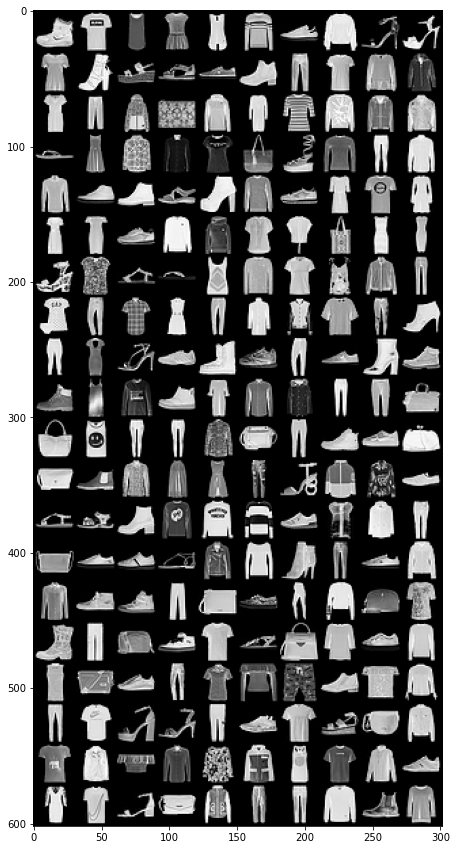

In [67]:
grid= torchvision.utils.make_grid(images, nrow= 10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:' + str(labels))

# Build CNN using Pytorch

Building model

* Create a neural network class that extends the nn.Module base class.
* In the class constructor, define the network’s layers as class attributes using pre-built layers from torch.nn.
* Use the network’s layer attributes as well as operations from the nn.functional API to define the network’s forward pass.

In [89]:
import torch.nn as nn

Parameters set Manually;

**- kernel_size** - Sets the filter size. The words kernel and filter are interchangeable.

**- out_channels** - Sets the number of filters. One filter produces one output channel. 

**- out_features** - Sets the size of the output tensor.

Hyperparameters(values are decided from data);

**- in_channels** - Depends on number of color channels present in the data (in this case, gray scale hence, 1)
**- out_features** - number of classes present in the dataset (in this case we have 10, 9:ankelbook, etc)
**- in_features** - depends on the previous out_features

In [123]:
# Forming CNN with hidden layers
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) # Convolution layer 1
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5) # Convolution layer 2
        
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120) # Linear layer 1 [Linear layer also called Fully Connected Layers]
        self.fc2 = nn.Linear(in_features=120, out_features=60) # Linear layer 2
        self.out = nn.Linear(in_features=60, out_features=10) # Linear layer 3 (output layer)
        
    def forward(self, t):
        # input layer
        t=t
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)
        
        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)
        
        return t

In [105]:
network= Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [106]:
# each layer can be accessed sepratly as well
network.conv1

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))

In [107]:
network.conv2

Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))

In [108]:
network.fc1

Linear(in_features=192, out_features=120, bias=True)

In [109]:
network.fc2

Linear(in_features=120, out_features=60, bias=True)

In [110]:
network.out

Linear(in_features=60, out_features=10, bias=True)

In [111]:
# Similarly, weights of each layer can also be accessed
network.conv1.weight
# And these are learnable during the training.
# Their values change to minimize the loss function 

Parameter containing:
tensor([[[[ 0.0659, -0.1246,  0.1628, -0.0887,  0.1249],
          [-0.1779,  0.1093, -0.1598, -0.1012,  0.0695],
          [ 0.1255,  0.1140, -0.1052, -0.0417,  0.1094],
          [ 0.1129, -0.0250, -0.1433,  0.1336, -0.0043],
          [ 0.0989, -0.1943,  0.0448, -0.0544, -0.1908]]],


        [[[ 0.0730, -0.0864,  0.0477,  0.1330, -0.0189],
          [-0.1631,  0.1377, -0.1913,  0.1874,  0.1892],
          [-0.0752, -0.1078,  0.1643,  0.1427,  0.1722],
          [-0.0189,  0.0458,  0.0330,  0.0190, -0.0346],
          [ 0.0625, -0.1964, -0.1823, -0.0291,  0.0804]]],


        [[[-0.1401, -0.0608,  0.0842,  0.0179, -0.0379],
          [ 0.1246, -0.1418,  0.1255, -0.1300,  0.0965],
          [-0.0593,  0.0906, -0.0964,  0.0275, -0.1765],
          [-0.0019, -0.0919,  0.1372,  0.1738, -0.1412],
          [-0.0294, -0.0057,  0.0317,  0.1396, -0.1797]]],


        [[[-0.0930,  0.0031,  0.1742,  0.1691,  0.0392],
          [ 0.0708, -0.1994,  0.1858, -0.0363, -0.0630

In [112]:
torch.set_grad_enabled(False)
# To turn off gradient operations, so the graph doesnt store memory, hence reduces memory consumption
# Should be tured on when training begins

In [113]:
sample= next(iter(train_set))

In [114]:
image, label= sample

In [115]:
image.shape

torch.Size([1, 28, 28])

In [116]:
image.unsqueeze(dim= 0).shape # Adds a batch with size 1

torch.Size([1, 1, 28, 28])

### Passing the image to our CNN 

In [117]:
pred= network(image.unsqueeze(0)) # iamge shape needs to be (batch_size, in_channels, height, weidth)

In [118]:
data_loader= torch.utils.data.DataLoader(train_set, batch_size=10)

In [119]:
batch= next(iter(data_loader))

In [120]:
images, labels= batch

In [121]:
images.shape

torch.Size([10, 1, 28, 28])

In [122]:
labels.shape

torch.Size([10])

In [124]:
preds= network(images)

In [125]:
images.shape

torch.Size([10, 1, 28, 28])

# Training the CNN

* Get batch from the training set.
* Pass batch to network.
* Calculate the loss (difference between the predicted values and the true values).
* Calculate the gradient of the loss function w.r.t the network's weights.
* Update the weights using the gradients to reduce the loss.
* Repeat steps 1-5 until one epoch is completed.
* Repeat steps 1-6 for as many epochs required to reach the minimum loss.

# In next notebook- Training the CNN